In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
gate_size=64
corr=[]

In [3]:
data=np.load('bach_g64.npy')
data=data[:2]

In [4]:
'''
for i in range(len(data)):
    for j in range(len(data)):
        for m in range(len(data[i])-gate_size):
            seqa=data[i][m:m+gate_size]
            for n in range(len(data[j])-gate_size):
                seqb=data[j][n:n+gate_size]
                corr.append(np.correlate(seqa,seqb))
                if len(np.correlate(seqa,seqb))!=1:
                    print(i,j,m,n)
                    break
'''

'\nfor i in range(len(data)):\n    for j in range(len(data)):\n        for m in range(len(data[i])-gate_size):\n            seqa=data[i][m:m+gate_size]\n            for n in range(len(data[j])-gate_size):\n                seqb=data[j][n:n+gate_size]\n                corr.append(np.correlate(seqa,seqb))\n                if len(np.correlate(seqa,seqb))!=1:\n                    print(i,j,m,n)\n                    break\n'

In [5]:
for i in range(len(data)):
    for j in range(len(data)):
        for m in range(len(data[i])-gate_size):
            seqa=data[i][m:m+gate_size]
            corr.append(np.correlate(seqa,data[j]))

In [9]:
data[0][0:0+gate_size].shape

(64,)

In [7]:
data[0][288:288+gate_size].shape

(63,)

In [8]:
len(data[0]-gate_size)

351

In [6]:
len(corr)

892

In [17]:
len(data[0])

351

In [18]:
len(data[1])

223

In [16]:
np.correlate([1, 2, 3], [0, 1, 0.5, 0, 0])

array([0.5, 2. , 3.5])

In [7]:
len(data)

2

In [7]:
means=[]

In [8]:
for pieces in corr:
    means.append(np.mean(pieces))

In [10]:
np.mean(np.array(means))

406.5132131290483

In [4]:
def corr_two_seq(seq1,seq2,gate_size):
    corr=[]
    for m in range(len(seq1)-gate_size):
        seqa=seq1[m:m+gate_size]
        corr.append(np.correlate(seqa,seq2))
    return corr

In [5]:
def mean_corr(corr):
    means=[]
    for pieces in corr:
        means.append(np.mean(pieces))
    return np.mean(np.array(means))

In [6]:
def mean_corr_normalize(corr):
    means=[]
    for pieces in corr:
        pieces=pieces/np.max(pieces)
        means.append(np.mean(pieces))
    return np.mean(np.array(means))

In [20]:
data=np.load('bach_g64.npy')
bach1=data[0]
bach2=data[1]
data=np.load('jazz_g64.npy')
jazz1=data[0]
jazz2=data[1]

In [14]:
corr_bach=corr_two_seq(bach1,bach2,64)

In [15]:
mean_corr(corr_bach)

415.05814459930315

In [16]:
corr_bj=corr_two_seq(bach1,jazz1,64)

In [17]:
mean_corr(corr_bj)

1340.3963829434213

In [19]:
mean_corr_normalize(corr_bj)

0.5671177691086079

In [20]:
mean_corr_normalize(corr_bach)

0.13989014252322318

In [7]:
def combine(seq1,seq2,gate_size):
    corr=corr_two_seq(seq1,seq2,gate_size)
    return mean_corr_normalize(corr)

In [35]:
combine(jazz2,jazz1,64)

1574.5933837709533

In [41]:
np.correlate([1, 2, 3], [0, 1, 0.5,0])

array([2. , 3.5])

In [37]:
np.cov([1, 2, 3], [0, 1, 0.5])

array([[1.  , 0.25],
       [0.25, 0.25]])

In [39]:
np.cov([1, 2, 3], [0, 2, 1])

array([[1. , 0.5],
       [0.5, 1. ]])

In [10]:
data_jazz=np.load('jazz_g64.npy')[:100]
data_bach=np.load('bach_g64.npy')[:100]

In [11]:
i=0
s=0
for jazz_piece in data_jazz:
    for bach_piece in data_bach:
        s+=combine(jazz_piece,bach_piece,64)
        i+=1

In [14]:
print(s/i)

0.36547777764141715


In [15]:
i=0
s=0
for jazz_piece in data_bach:
    for bach_piece in data_bach:
        s+=combine(jazz_piece,bach_piece,64)
        i+=1

In [16]:
print(s/i)

0.2886178956516095


In [17]:
i=0
s=0
for jazz_piece in data_jazz:
    for bach_piece in data_jazz:
        s+=combine(jazz_piece,bach_piece,64)
        i+=1

In [18]:
print(s/i)

0.3499442211221298


In [22]:
bach1_g=bach1[100:100+gate_size]

In [23]:
cor=np.correlate(bach1_g,bach1)

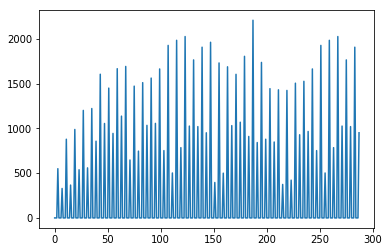

In [43]:
plt.plot(cor)

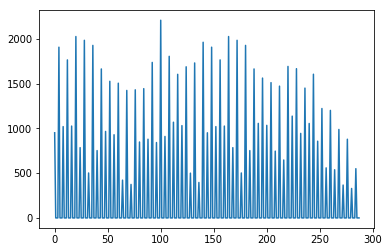

In [42]:
plt.plot(cor[::-1])

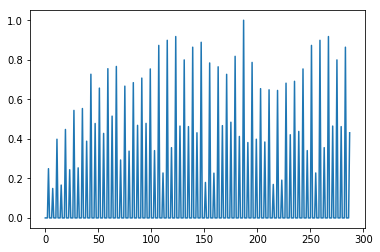

In [45]:
plt.plot(cor/np.max(cor))

In [48]:
np.sum(cor/np.max(cor))

39.364583333333336

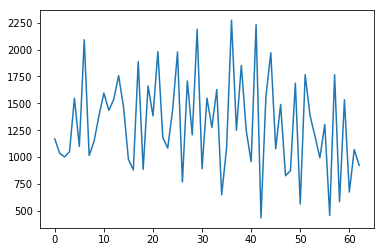

In [53]:
cor=np.correlate(bach1_g,jazz1)
plt.plot(cor[::-1])

In [54]:
jazz1

array([ 0,  0,  0,  0, 14,  0,  0, 21,  0,  0, 30,  0, 21,  0, 30,  0,  0,
       21,  0, 14,  0, 21,  0,  0, 30,  0, 21,  0,  0, 30,  0, 21,  0, 14,
        0,  0, 23,  0, 31,  0, 23,  0,  0, 31,  0, 23,  0,  0, 14,  0, 23,
        0, 31,  0,  0, 23,  0, 31,  0, 23,  0,  1, 14,  0, 25,  0, 33,  0,
        0, 25,  0, 33,  0, 25,  0,  0, 14,  0,  0, 25,  0, 33,  0, 25,  0,
       33,  0,  0, 25,  0, 14,  0,  0, 21,  0,  0, 30,  0, 21,  0,  0, 30,
        0, 21,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0], dtype=int64)

In [44]:
cor[::-1][100]

2208

In [39]:
np.correlate(bach1_g,bach1[0:0+gate_size])

array([951], dtype=int64)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import multiprocessing
%matplotlib inline

In [2]:
def corr_two_seq(seq1,seq2,gate_size):
    corr=[]
    for m in range(len(seq1)-gate_size):
        seqa=seq1[m:m+gate_size]
        corr.append(np.correlate(seqa,seq2))
    return corr

def mean_corr_normalize(corr):
    means=[]
    for pieces in corr:
        pieces=pieces/np.max(pieces)
        means.append(np.mean(pieces))
    return np.mean(np.array(means))

def combine(seq1,seq2,gate_size):
    corr=corr_two_seq(seq1,seq2,gate_size)
    return mean_corr_normalize(corr)

def cor_score(data_1,data_2,num):
    i = 0
    s = 0

    for piece1 in data_1:
        for piece2 in data_2:
            s += combine(piece1, piece2, 64)
            i += 1
    s = s / i
    return s

'''
def multi_corr(func,arg1,arg2,data_span,thread_amount):
    threads = []
    n=0
    for i in range(thread_amount):
        threads.append(threading.Thread
                       ( target=func, args=(copy.deepcopy(arg1[n:n+data_span]),
                                            copy.deepcopy(arg2[n:n+data_span]), i) ))
        n+=data_span
    return threads    
'''

def elapsed(sec):
    if sec<60:
        return str(sec) + " sec"
    elif sec<(60*60):
        return str(sec/60) + " min"
    else:
        return str(sec/(60*60)) + " hr"


In [3]:
data_jazz=np.load('jazz_g64.npy')
data_bach=np.load('bach_g64.npy')
num_threads=16

In [2]:
data_jazz=np.load('jazz_g64_notes.npy')
data_bach=np.load('bach_g64_notes.npy')

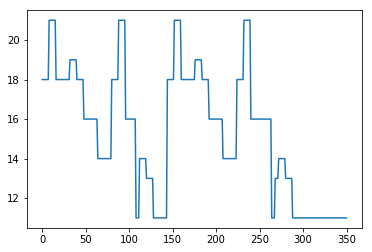

In [3]:
plt.plot(data_bach[0])

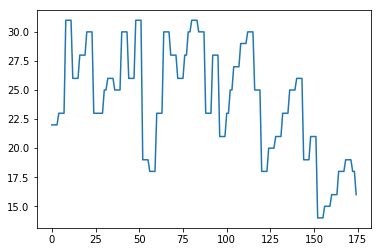

In [4]:
plt.plot(data_bach[8])

In [5]:
data_bach_m=np.load('bach_g64.npy')

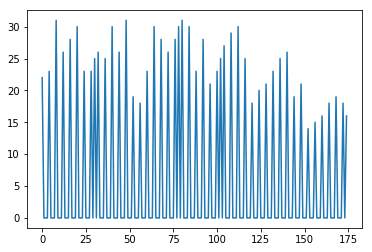

In [6]:
plt.plot(data_bach_m[8])